1. Create a 4 dimensional data set with 64 elements and show 2D plots of the data $x_1 \rightarrow y, x_2 \rightarrow y$, etc.

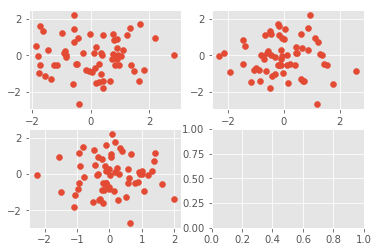

In [44]:
import numpy as np
import pandas as pd

s = pd.DataFrame(np.random.randn(64,4))
s.rename(columns={0: 'x1',1: 'x2',2:'x3',3:'y'}, inplace=True)

import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig, ax = plt.subplots(2,2) 
ax[0,0].scatter(s['x1'], s['y']) 
ax[0,1].scatter(s['x2'], s['y']) 
ax[1,0].scatter(s['x3'], s['y']) 

plt.show()


2. Create a model to fit the data. Hint: follow the example from Lesson 3

In [47]:
import statsmodels.api as sm
X = sm.add_constant(s)
X.drop('y',axis =1,inplace=True)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.049
Method:                 Least Squares   F-statistic:                   0.02853
Date:                Sat, 20 May 2017   Prob (F-statistic):              0.993
Time:                        11:24:04   Log-Likelihood:                -90.076
No. Observations:                  64   AIC:                             188.2
Df Residuals:                      60   BIC:                             196.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0771      0.129     -0.599      0.551        -0.334     0.180
x1             0.0208      0.120      0.174      0.862        -0.218     0.260
x2            -0.0349      0.137     -0.255      0.800        -0.309     0.239
x3             0.0049      0.160      0.031      0.976        -0.316     0.326
==============================================================================
Omnibus:                        0.163   Durbin-Watson:                   1.629
Prob(Omnibus):                  0.922   Jarque-Bera (JB):                0.360
Skew:                           0.040   Prob(JB):                        0.835
Kurtosis:                       2.641   Cond. No.                         1.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

3. Plot the model's prediction in 2D for 2 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p$) along with the original points

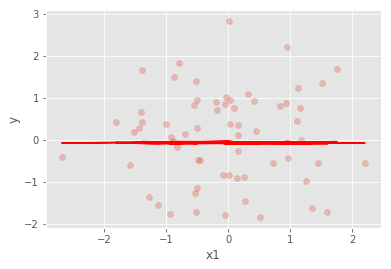

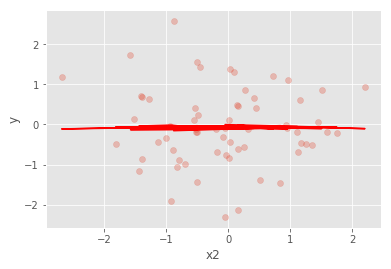

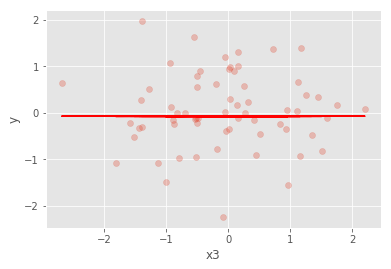

In [54]:
X1 = s['x1']
X1 = sm.add_constant(X1)
est1 = sm.OLS(s['y'], X1).fit()
plt.scatter(s['y'], s['x1'], alpha=0.3)
plt.xlabel('x1')
plt.ylabel('y')
plt.plot(s['y'], est1.params[0] + est1.params[1] *X1['x1'], 'r')

plt.show()

X2 = s['x2']
X2 = sm.add_constant(X2)
est2 = sm.OLS(s['y'], X2).fit()
plt.scatter(s['y'], s['x2'], alpha=0.3)
plt.xlabel('x2')
plt.ylabel('y')
plt.plot(s['y'], est2.params[0] + est2.params[1] *X2['x2'], 'r')

plt.show()

X3 = s['x3']
X3 = sm.add_constant(X3)
est3 = sm.OLS(s['y'], X3).fit()
plt.scatter(s['y'], s['x3'], alpha=0.3)
plt.xlabel('x3')
plt.ylabel('y')
plt.plot(s['y'], est3.params[0] + est3.params[1] *X3['x3'], 'r')

plt.show()





4. Read in mlnn/data/Credit.csv with Pandas and create a model to predict Credit Rating (Rating). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating


In [77]:
Credit = pd.read_csv("/Users/e_chertow/Documents/Ahmed/Documents/JhuMachineLearning/Credit.csv")
X = Credit[['Income', 'Limit']]
X = sm.add_constant(X)
y = Credit['Rating']
estCredit = sm.OLS(y, X).fit()
estCredit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 3.170e+04
Date:                Sat, 20 May 2017   Prob (F-statistic):               0.00
Time:                        15:40:15   Log-Likelihood:                -1567.8
No. Observations:                 400   AIC:                             3142.
Df Residuals:                     397   BIC:                             3154.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         38.7419      1.439     26.918      0.000        35.912    41.571
Income         0.0207      0.028      0.729      0.467        -0.035     0.077
Limit          0.0666      0.000    153.124      0.000         0.066     0.067
==============================================================================
Omnibus:                        7.285   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                5.299
Skew:                           0.158   Prob(JB):                       0.0707
Kurtosis:                       2.532   Cond. No.                     1.24e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 5. Plot your results (Bonus if you use 3D plots). Show as many of your columns vs. credit rating that you can.

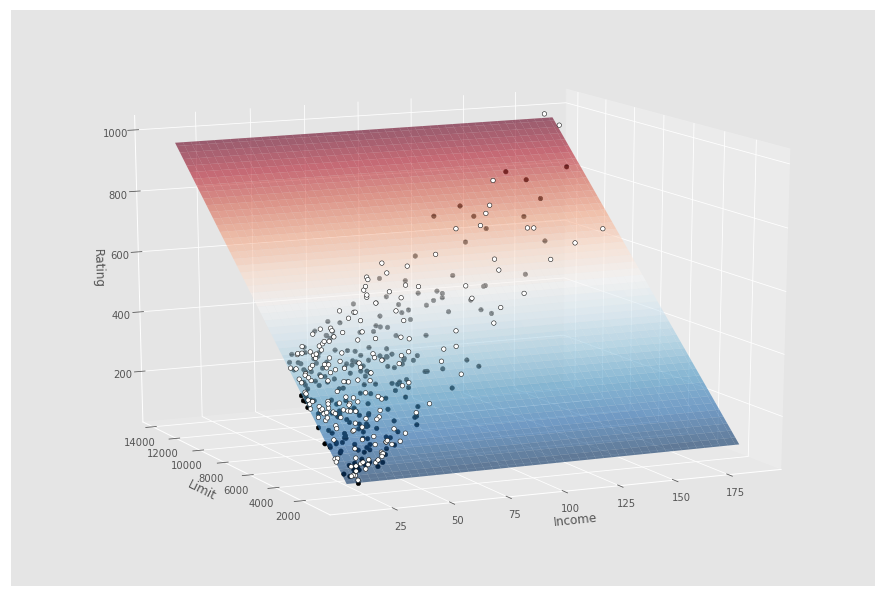

In [74]:
## Create the 3d plot 

from mpl_toolkits.mplot3d import Axes3D

xx1, xx2 = np.meshgrid(np.linspace(X.Income.min(), X.Income.max(), 100), 
                       np.linspace(X.Limit.min(), X.Limit.max(), 100))

Z = estCredit.params[0] + estCredit.params[1] * xx1 + estCredit.params[2] * xx2

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
resid = y - estCredit.predict(X)

ax.scatter(X[resid >= 0].Income, X[resid >= 0].Limit, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].Income, X[resid < 0].Limit, y[resid < 0], color='black', alpha=1.0)

# set axis labels
ax.set_xlabel('Income')
ax.set_ylabel('Limit')
ax.set_zlabel('Rating')

plt.show()
